<a href="https://colab.research.google.com/github/darmawan20/AI_Machine_Failure_Analysis/blob/main/AI_Machine_Failure_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== Data Awal ===
    Tegangan  Arus Kondisi
0        220   5.0  Normal
1        219   5.1  Normal
2        200   7.2   Rusak
3        210   6.8   Rusak
4        230   4.8  Normal
5        180   8.0   Rusak
6        225   5.0  Normal
7        190   7.5   Rusak
8        240   4.6  Normal
9        195   7.8   Rusak
10       205   6.2   Rusak
11       215   5.4  Normal

Akurasi Model: 100.00%

=== Hasil Prediksi ===
   Data Asli Prediksi
10     Rusak    Rusak
9      Rusak    Rusak
0     Normal   Normal
8     Normal   Normal


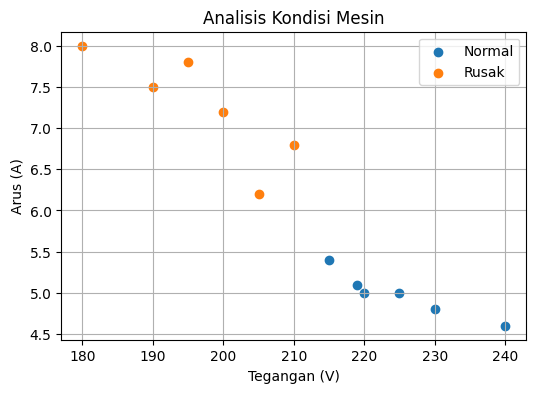


Prediksi untuk Tegangan=205V dan Arus=6.9A adalah: Rusak


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# =============================
# Analisis Kerusakan Mesin Sederhana
# =============================

# Import library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# 1. Buat dataset sederhana
data = {
    'Tegangan': [220, 219, 200, 210, 230, 180, 225, 190, 240, 195, 205, 215],
    'Arus':     [5.0, 5.1, 7.2, 6.8, 4.8, 8.0, 5.0, 7.5, 4.6, 7.8, 6.2, 5.4],
    'Kondisi':  ['Normal', 'Normal', 'Rusak', 'Rusak', 'Normal', 'Rusak', 'Normal', 'Rusak', 'Normal', 'Rusak', 'Rusak', 'Normal']
}

df = pd.DataFrame(data)
print("=== Data Awal ===")
print(df)

# 2. Pisahkan fitur dan label
X = df[['Tegangan', 'Arus']]
y = df['Kondisi']

# 3. Bagi data jadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Buat model AI sederhana
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# 5. Prediksi data baru
y_pred = model.predict(X_test)

# 6. Cek akurasi
acc = accuracy_score(y_test, y_pred)
print("\nAkurasi Model: {:.2f}%".format(acc * 100))

# 7. Tampilkan hasil perbandingan prediksi
hasil = pd.DataFrame({'Data Asli': y_test, 'Prediksi': y_pred})
print("\n=== Hasil Prediksi ===")
print(hasil)

# 8. Visualisasi data
plt.figure(figsize=(6,4))
for kondisi in df['Kondisi'].unique():
    subset = df[df['Kondisi'] == kondisi]
    plt.scatter(subset['Tegangan'], subset['Arus'], label=kondisi)
plt.xlabel('Tegangan (V)')
plt.ylabel('Arus (A)')
plt.title('Analisis Kondisi Mesin')
plt.legend()
plt.grid(True)
plt.show()

# 9. Contoh prediksi manual
sample = [[205, 6.9]]
pred = model.predict(sample)
print(f"\nPrediksi untuk Tegangan=205V dan Arus=6.9A adalah: {pred[0]}")
